# Titanic Project

**Goal** is to predict if passenfer will survive or not the Titanic accident

We have three datasets

### Data Dictionary
`Survived` : Survival, 0 = No, 1 = Yes

`Pclass` : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

`Sex` : Sex

`Age` : Age in years

`SibSp` : Number of siblings / spouses aboard the Titanic

`Parch` : Number of parents / children aboard the Titanic

`Ticket` : Ticket number

`Fare` : Passenger fare

`Cabin` : Cabin number

`Embarked`: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

`Pclass`: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

`Age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp`: The dataset defines family relations in this way:

- `Sibling` = brother, sister, stepbrother, stepsister

- `Spouse` = husband, wife (mistresses and fiancés were ignored)

`Parch`: The dataset defines family relations in this way Parent = mother, father Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

*Source: Instructions*

## General Overview 

1. Understand the shape of the data 

2. Data Cleaning 

3. Data Exploration

4. Feature Enginerring

5. Data Preprocessing for Model

6. Basic Model Buiilding 

7. Model Tuning 

8. Ensemble Model Building 

9. Results




In [68]:
import numpy as np
import pandas as pd
import re
# import calendar

import seaborn as sns
import matplotlib.style as style
from pylab import rcParams


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [69]:
# grid: rgb(240,240,240)
# background: rgb(200,200,200)
style.use('fivethirtyeight')
# mpl.rcParams['figure.dpi']= 150
# # plt.subplots(figsize=(11, 9))
# sns.mpl.rc("figure", figsize=(11, 9))
# rcParams['figure.figsize'] = 11.7,8.27
# plt.rcParams['figure.figsize']=(11,9) 
import warnings
warnings.filterwarnings(action='ignore')

## Load Datasets

In [70]:
gender_df = pd.read_csv('data/gender_submission.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## 1. Understanding the shape of the data

In [48]:
def getting_to_know(df, question=None):
  '''Returns shape and columns. More info if "y" parameter is included'''
  display(df.shape)
  display(df.columns)
  if question == 'y':
      display(df.head())
      display(df.tail())
  print('--------------------------END--------------------------------')


getting_to_know(train_df, 'y')
getting_to_know(test_df , 'y')

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


--------------------------END--------------------------------


(418, 11)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


--------------------------END--------------------------------


### Project Planning

Make a rough outline of the project

- Understand nature of the data  using `.describe()`, `.info()`

- Value counts on some features of interest

- Correlation between some feature metrics

- Explore interesting subjects
  - Wealthy vs poor survival
  - Lcation by cabin
  - Age scatterplot

- Feature engineering

- Preprocess data or use some other transformer
  - k fold cross validation

- Model Baseline

- Model comparison with CV on Ensemble


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- We see less data in `age`, `Cabin`, and `Embarked`. Prove it.

## 2. Data Cleaning

For purpose of this competition, we won't drop any entire feature from the training set. However, we do want inspect and see how much `NaN` data we have.

In [51]:
# Missing values
def missing_values_func(df):
    """
    @author: Cristobal Zamorano Astudillo
    
    Personalize Missing Data Function
    
    Paramaters
    ----------
    df : DataFrame of interest
    
    Returns
    -------
    A string with counting all the features of the input DataFrame. If some values are missing, then 
    function will return a DataFrame with the following:
    - Index as the features with the missing values
    - A `Missing Values Count` Feature that tells the exact number of rows that has a misssing value in that feature index.
    - A `% of Total Values` that tells how much are the missing values of that feature with respect to the other missing values.
    """
    
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values Count', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)


    # Returns
    if mis_val_table_ren_columns.empty:
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
    else:
        display(mis_val_table_ren_columns.style.background_gradient(cmap='Reds'))
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
        
missing_values_func(train_df)

,Missing Values Count,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


'Your selected dataframe has  12 features. There are  3 features that have missing values.'

Certainly missing 687 values of the `Cabin` feature present us a problem to deal with missing values. If we decide to drop those missing rows then we would lose 77% of the data. A similar story happens witht he 20% missing values of the `Age` feature.


Later on we will replace the `NaN` values with some actual values.

Divide data into categorical and numerical features and store them in variables:

In [52]:
# Check for NON Categorical features
non_categorical_feature_mask = train_df.dtypes!=object
# Filter non categorical columns using mask and turn it into a list
non_categorical_features = train_df.columns[non_categorical_feature_mask].tolist()
non_categorical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [53]:
# Check for Categorical features
categorical_feature_mask = train_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_df.columns[categorical_feature_mask].tolist()
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Numerical data**
- Make Histograms to see distributions
- Pivot it to see the survival rate 

**Categorical data**
- Make bar chart to see different features
- Pivot it to see the survival rate 

## 3. Data Exploration

Make a correlation matrix using a covariance matrix to see if there is any specific correlation among features in the trainign dataset. Since we know that 20% of the `Age` feature are missing, we'll drop those rows for this purpose only.

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not

In [58]:
non_categ_no_target = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
metrics = train_df.loc[:, non_categ_no_target]
# metrics.drop(columns=['Survived'], inplace = True)
metrics.dropna(inplace=True)
mean_metrics = np.mean(metrics)
sd_metrics = np.std(metrics)
metrics_std = (metrics - mean_metrics) / sd_metrics 
metrics_std.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-1.728532,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.724670,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,-1.720808,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.716946,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-1.713084,0.911232,0.365167,-0.551703,-0.505895,-0.503850


$$\Sigma=\frac{1}{n-1}\left((\mathbf{X}-\overline{\mathbf{x}})^{T}(\mathbf{X}-\overline{\mathbf{x}})\right)$$

In [59]:
mean_vec = np.mean(metrics_std, axis=0)
cov_mat = (metrics_std - mean_vec).T.dot((metrics_std - mean_vec)) / (metrics_std.shape[0]-1)
print(f'Covariance matrix \n' ,cov_mat.shape,'\nis a square matrix')

Covariance matrix 
 (6, 6) 
is a square matrix


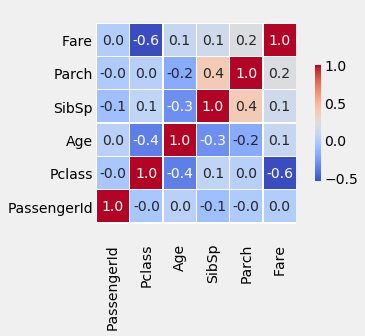

In [60]:
ax = sns.heatmap(cov_mat, 
            xticklabels=cov_mat.columns.values,
            yticklabels=cov_mat.columns.values,
           annot=True, fmt='.1f',cbar_kws={"shrink": .5},  linewidths=.1, cmap='coolwarm', 
            square=True)
plt.yticks(rotation = 0)
ax.set_ylim(-0.5,len(cov_mat)+0.5);

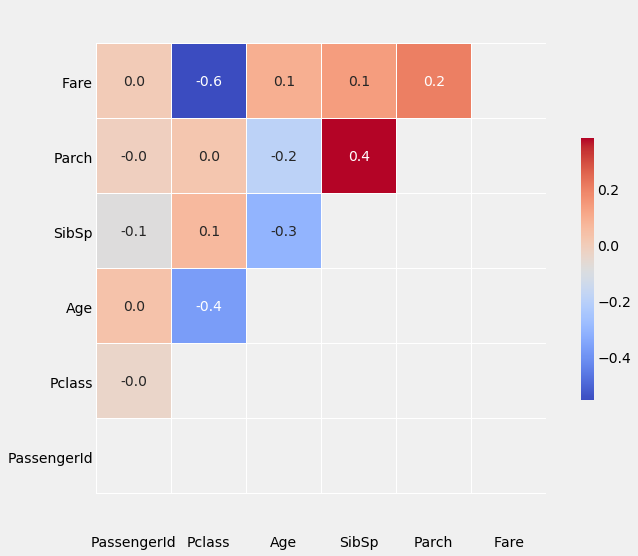

In [61]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(cov_mat, mask=mask, cmap='coolwarm', 
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')
plt.yticks(rotation = 0)
ax.set_ylim(-0.5,len(cov_mat)+0.5);

In [14]:
# metrics = train_df.loc[:, non_categorical_features]
# metrics.drop(columns=['Survived'], inplace = True)
# metrics.dropna(inplace=True)
# corr = metrics.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# # cmap = sns.diverging_palette(240, 10, n=7, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap='coolwarm', 
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f');

**Note from Covariance Matrix** 
- The features with the highest correlation are `Parch` and `SibSP`. From Office Hours, it was explain that those features are the number of family members a passenger was traveling. It makes sense to have a correlation
    - The number of sibling and children has a negative correlation with age. However, familys tend to travel together and we see a greater correlation with the number of parents and siblings/children
- Surprisingly `Pclass` and `Fare` don't have a major correlation.

Since we are not using a Linear Regression model for this project, we are not too worry witht he colinearity of the fetures. 


In [15]:
plt.rcParams['figure.figsize']=(11,9) 

In [16]:
# for purpose of visualization, change the Survived numerical values to Died and Alive
surv_func = lambda x:'Alive' if x == 1 else 'Died'
train_df['Survived_Categorial'] = train_df['Survived'].apply(surv_func)

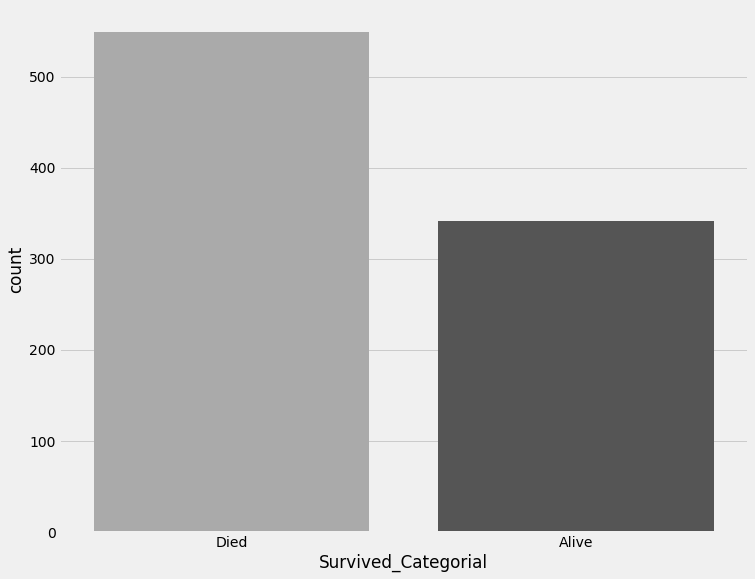

In [17]:
sns.countplot(x='Survived_Categorial', data=train_df, palette='binary');

Almost half of people did not survived from the collison with the iceberg

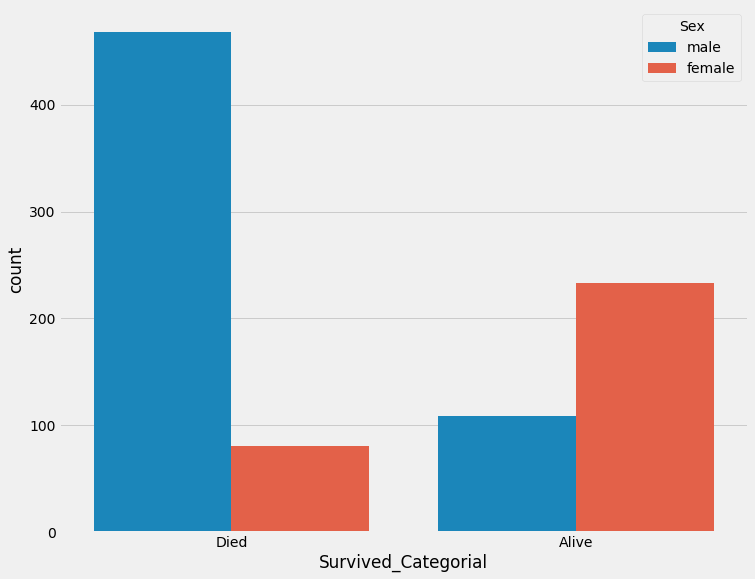

In [18]:
sns.countplot(x='Survived_Categorial', hue='Sex', data=train_df);

From the movie I remember that escape boats were prioritizing children and women. From above we see that way more male did not survived.

3    491
1    216
2    184
Name: Pclass, dtype: int64

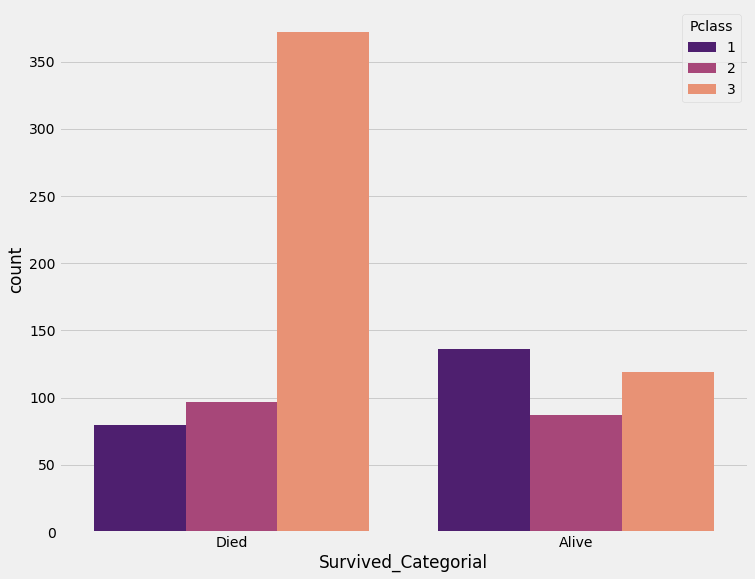

In [19]:
display(train_df['Pclass'].value_counts())
sns.countplot(x='Survived_Categorial', hue = 'Pclass', data = train_df, palette = 'magma');

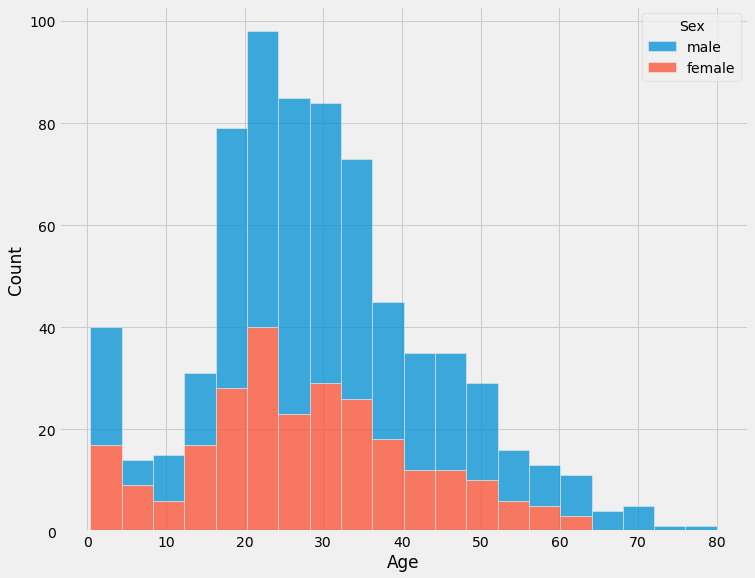

In [20]:
sns.histplot(train_df, x="Age", hue="Sex", hue_order=['male', 'female'], multiple= 'stack');

The average seems to be around 17 to 40 years old. Now put them together and see the survival difference.

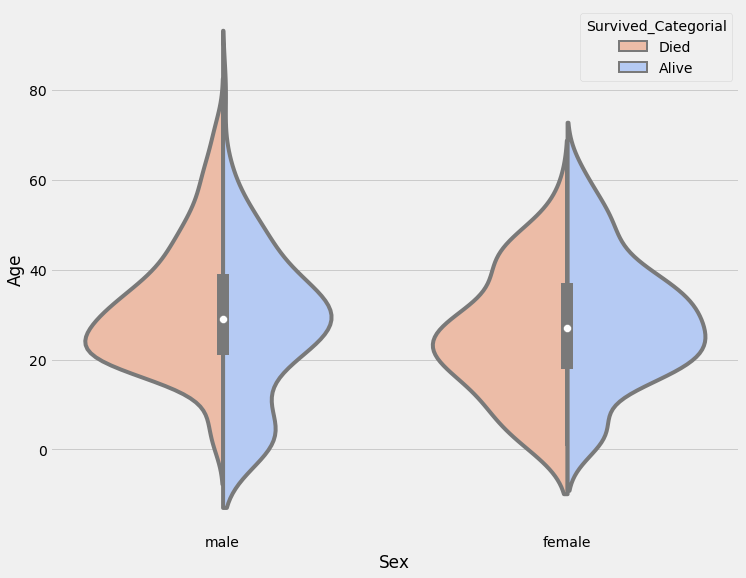

In [21]:
sns.violinplot(data = train_df, x = 'Sex', y = 'Age', hue = 'Survived_Categorial', split = True, palette = 'coolwarm_r');


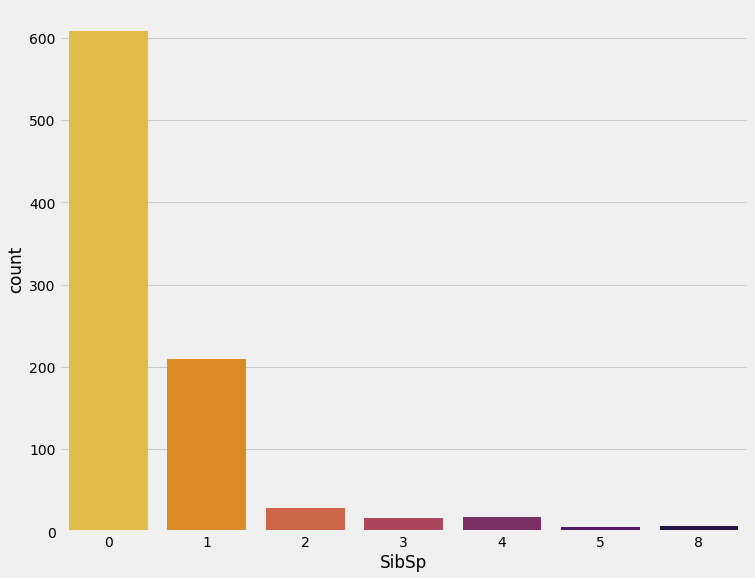

In [22]:
sns.countplot(x='SibSp', data=train_df, palette = 'inferno_r');

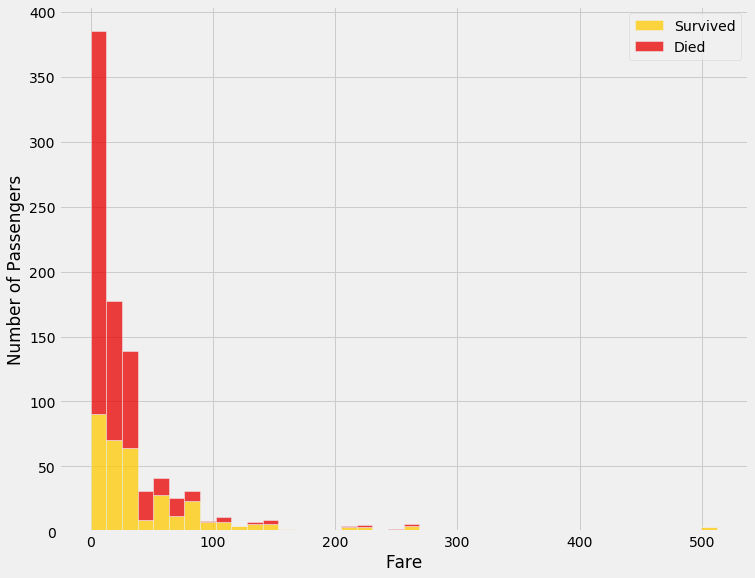

In [23]:
# fare_alive = train_df[train_df['Survived'] == 1]['Fare']
# fare_dead = train_df[train_df['Survived'] == 0]['Fare']
# sns.histplot(train_df, x=fare_alive, bins = 40, color = 'red')
# sns.histplot(train_df, x=fare_dead, bins = 40);

sns.histplot(train_df, x='Fare', bins = 40, hue = 'Survived', multiple = 'stack', palette = 'hot')
plt.ylabel('Number of Passengers')
my_labels = ['Survived', 'Died']
plt.legend(labels = my_labels);

In [24]:
# Compare Survival rate accross all numerical features.
# pivot_table : Create a spreadsheet-style pivot table as a DataFrame. Will take the mean according to
# the Index
temp = ['Age', 'SibSp', 'Parch', 'Fare']
pd.pivot_table(train_df, index = 'Survived_Categorial', values = temp)


,Age,Fare,Parch,SibSp
Survived_Categorial,,,,
Alive,28.343690,48.395408,0.464912,0.473684
Died,30.626179,22.117887,0.329690,0.553734


From above we can make the following notes: 
- People younger might have a higher chance of surviving
- People that paid more also might have survived more.
- People with parents were prioritize for the escape boats (movie memeory) so they had a higher chance to survive 
- However, by having siblings you might have a higher chance of surviving.

In [25]:
# Compare Survival rate to each categorical feature
# Pclass
display(pd.pivot_table(train_df, index = 'Survived_Categorial', values = 'PassengerId', columns = 'Pclass', aggfunc='count'))
# Embarked
display(pd.pivot_table(train_df, index = 'Survived_Categorial', values = 'PassengerId', columns = 'Embarked', aggfunc='count'))
# Cabin
display(pd.pivot_table(train_df, index = 'Survived_Categorial', values = 'PassengerId', columns = 'Cabin', aggfunc='count'))
# Sex
pd.pivot_table(train_df, index = 'Survived_Categorial', values = 'PassengerId', columns = 'Sex', aggfunc='count')

Pclass,1,2,3
Survived_Categorial,,,
Alive,136,87,119
Died,80,97,372


Embarked,C,Q,S
Survived_Categorial,,,
Alive,93,30,217
Died,75,47,427


Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived_Categorial,,,,,,,,,,,,,,,,,,,,,
Alive,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,2.0,1.0,NaN,NaN,2.0,3.0,NaN,2.0,2.0,NaN
Died,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,2.0,1.0,NaN,1.0,NaN,2.0,1.0


Sex,female,male
Survived_Categorial,,
Alive,233,109
Died,81,468


## 4. Feature Engineering

From above Exploration we see that
- Need to solve the missing values for
    - Age - random numbers using mean and sd
    - Cabin - NOT SURE YET
    - Embarked - only two values are missing so only fill those values with most common value
- We can play with famliy size and see if someone who was traveling alone from or not had higher chance to survive (Office Hours idea)
- Make categorical ranges of numerical features such as age or fare
- Solve the mess with Ticket
- From Office Hours try to figure a way to extract social status of passenegers

### Family Size

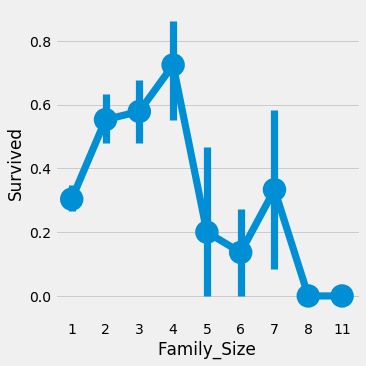

In [26]:
# Factorplot: . It provides beautiful default styles and color palettes to make statistical plots more attractive.
# It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

# # Change back Survived to Numerical 
# surv_func_num = lambda x: 0 if x == 'Alive' else 1
# train_df['Survived'] = train_df['Survived'].apply(surv_func_num)

# Adding a Family_Size feature
train_df['Family_Size'] = 1
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp'] + 1

# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size',
               y ='Survived',
               data = train_df);

from above we can define three different classes of families
- `Alone` - people traveling with 1 person (themselves)
- `Small_Family` - people traveling with 2 and 3 people
- `Medium_Family` - between 4 and 6
- `Large_Family` - 7 and more people

In [27]:
# Adding a Alone feature
train_df['Alone'] = 0
alone_func = lambda x : 1 if x == 1 else 0
train_df['Alone'] = train_df['Family_Size'].apply(alone_func)

# Adding a Small_Family feature
train_df['Small_Family'] = 0
small_fam_func = lambda x : 1 if 2 <= x <= 3 else 0
train_df['Small_Family'] = train_df['Family_Size'].apply(small_fam_func)

# Adding a Medium_Family feature
train_df['Medium_Family'] = 0
medium_fam_func = lambda x : 1 if 4 <= x <= 6 else 0
train_df['Medium_Family'] = train_df['Family_Size'].apply(medium_fam_func)

# Adding a Large_Family feature
train_df['Large_Family'] = 0
large_fam_func = lambda x : 1 if 7 <= x else 0
train_df['Large_Family'] = train_df['Family_Size'].apply(large_fam_func)

In [28]:
# fig = plt.figure(figsize=(15,15))

# # Factorplot for Alone
# ax1 = fig.add_subplot(2,2,1)
# ax1 = sns.factorplot(x ='Alone',
#                y ='Survived',
#                data = train_df)

# # Factorplot for Alone 
# ax2 = fig.add_subplot(2, 2,2)
# ax2 = sns.factorplot(x ='Small_Family',
#                y ='Survived',
#                data = train_df)

# # Factorplot for Alone 
# ax3 = fig.add_subplot(2, 2,3)
# ax3 = sns.factorplot(x ='Medium_Family',
#                y ='Survived',
#                data = train_df)

# # Factorplot for Alone 
# ax4 = fig.add_subplot(2, 2,4)
# ax4 = sns.factorplot(x ='Large_Family',
#                y ='Survived',
#                data = train_df);

### `Embarked`

In [29]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
# Recall that only two rows are missing values in Embarked so let's just fill them up
train_df['Embarked'].fillna('S', inplace = True)

In [31]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# # Since not all features are categorical features,  `make_column_transformer` will only
# # one hot encode the categorical feature and the rest will passthrough
# column_trans = make_column_transformer(
#     (OneHotEncoder(sparse=False), ['Embarked']),
#     remainder = 'passthrough'
# )

# train_df = column_trans.fit_transform(train_df)
# train_df.head()

### `Cabin`

Let's see if for some reason people with more money or with larger families would own more than cabin.

In [34]:
# The feature with most missing values is Cabin with U for Unknown
# train_df['Cabin'].fillna('U', inplace=True)

# See if the Passengers (especially the wealthy ones) had multiple cabins
cabin_func = lambda x : 0 if pd.isna(x) else len(x.split(' '))
train_df['Cabin_Multiple'] = train_df['Cabin'].apply(cabin_func)
train_df['Cabin_Multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_Multiple, dtype: int64

No. Most people had only one cabin.

In [35]:
pd.pivot_table(train_df, index = 'Survived_Categorial', columns = 'Cabin_Multiple', values = 'PassengerId', aggfunc = 'count')

Cabin_Multiple,0,1,2,3,4
Survived_Categorial,,,,,
Alive,206.0,122.0,9.0,3.0,2.0
Died,481.0,58.0,7.0,3.0,NaN


In [36]:
# The feature with most missing values is Cabin with U for Unknown
train_df['Cabin'].fillna('U', inplace=True)

In [37]:
# See letter of the Cabin and use it as section
cabin_func_2 = lambda x : str(x)[0]
train_df['Cabin_Section'] = train_df['Cabin'].apply(cabin_func_2)
train_df['Cabin_Section'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Section, dtype: int64

In [38]:
pd.pivot_table(train_df, index = 'Survived_Categorial', columns = 'Cabin_Section', values = 'PassengerId', aggfunc = 'count')

Cabin_Section,A,B,C,D,E,F,G,T,U
Survived_Categorial,,,,,,,,,
Alive,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0
Died,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0


If we assume that each Cabin letter is a section inside the ship, then we can say that the U Cabins could have been assigned for working staff such as musicians, kitchen workers, maintenance, and others. 

From above, we can observe that most people in the U Cabins were not able to survive. That enhance the hypothesis.

### `Age`

In [37]:
train_df['Age'][np.isnan(train_df['Age'])]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [38]:
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()
age_null_count = train_df['Age'].isnull().sum()

# Return random integers from `low` (inclusive) to `high` (exclusive).
age_null_random = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
# Choose the rows that are null and fill them up
train_df['Age'][np.isnan(train_df['Age'])] = age_null_random
train_df['Age'] = train_df['Age'].astype(int)

pd.pivot_table(train_df, index = 'Survived_Categorial', columns = 'Age', values = 'PassengerId', aggfunc = 'count')

Age,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,70,71,74,80
Survived_Categorial,,,,,,,,,,,,,,,,,,,,,
Alive,7.0,5.0,3.0,5.0,7.0,4.0,2.0,1.0,2.0,2.0,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Died,NaN,2.0,7.0,1.0,3.0,NaN,1.0,2.0,2.0,6.0,...,3.0,2.0,NaN,2.0,3.0,1.0,3.0,2.0,1.0,NaN


### Passengers' Name Titles

From the Passengers names we see that they have certain titles such as Mr. or Miss. Let's make a new feature out of that.

In [44]:
train_df['Name'].value_counts()

Gilinski, Mr. Eliezer            1
McMahon, Mr. Martin              1
Stead, Mr. William Thomas        1
Radeff, Mr. Alexander            1
Asim, Mr. Adola                  1
                                ..
Hickman, Mr. Lewis               1
Collander, Mr. Erik Gustaf       1
Carter, Mr. William Ernest       1
Lindell, Mr. Edvard Bengtsson    1
Graham, Miss. Margaret Edith     1
Name: Name, Length: 891, dtype: int64

In [45]:
# Strip the Name string in a smaller df.
short_df = train_df.loc[1:len(train_df)/8, :]
title_func = lambda x : x.split(',')[1].split('.')[0]
short_df['Name_Title'] = short_df['Name'].apply(title_func)
short_df['Name_Title'].value_counts()

 Mr        60
 Miss      26
 Mrs       17
 Master     7
 Don        1
Name: Name_Title, dtype: int64

In [46]:
# Apply in entire training set
title_func = lambda x : x.split(',')[1].split('.')[0].strip()
train_df['Name_Title'] = train_df['Name'].apply(title_func)
train_df['Name_Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Ms                1
Capt              1
Sir               1
Lady              1
Mme               1
the Countess      1
Don               1
Name: Name_Title, dtype: int64

In [47]:
# train_df.loc[train_df['Name_Title'] == 'Capt']
# train_df.loc[~train_df['Name_Title'].isin('Mr')]
# train_df.query("Name_Title == 'Mr'")

We have several titles that are not currently used or are similar or even equal than others. 

Let's group them in the following categegories under the British and French context:
- Royalty - for like very exclusive passangers. Military, Church, and others.
- Wife - Hundred years ago the world would discrimanate socially women that were not married so there are some specfic titles to identify the marriage status of a woman.
- Profesional - for people that have an social role. Received by merit instead of heritage only.
- Ordinary - people that are mostly not married but also some must be married too. Hundred years ago there was only one title for men. Mr was applied for married, single, young, and older men

In [48]:
# https://en.wikipedia.org/wiki/French_honorifics#:~:text=%22Madame%22%20(Mme)%20for,plural%20is%20Mesdemoiselles%20(Mlles).
# https://en.wikipedia.org/wiki/Jonkheer#:~:text=Jonkheer%20(female%20equivalent%3A%20jonkvrouw%3B,used%20by%20the%20untitled%20nobility.
# https://www.shutterfly.com/ideas/difference-between-ms-mrs-miss/#:~:text=and%20Mrs.&text=Ms.%3A%20Use%20%E2%80%9CMs.,when%20addressing%20a%20married%20woman.
# https://en.wikipedia.org/wiki/The_Reverend#:~:text=The%20Reverend%20is%20an%20honorific,of%20Christian%20clergy%20and%20ministers.&text=The%20Reverend%20is%20correctly%20called,address%20or%20title%20of%20respect.
# https://en.wikipedia.org/wiki/Master_(form_of_address)
# https://en.wikipedia.org/wiki/Colonel_(United_Kingdom)#:~:text=Colonel%20(Col)%20is%20a%20rank,at%20battalion%20and%20brigade%20level.
# https://en.wikipedia.org/wiki/Major_(United_Kingdom)#:~:text=Major%20(Maj)%20is%20a%20military,a%20major%20is%20a%20crown.
# https://elitetitles.co.uk/sir_dame.html#:~:text=Sir%3A%20A%20title%20of%20honour,the%20Queen's%20Birthday%20Honours%20lists.
# https://en.wikipedia.org/wiki/Don_(honorific)#:~:text=Usage-,General,may%20also%20be%20used%20ironically.
# https://elitetitles.co.uk/earl_countess.html#:~:text=Countess%3A%20Is%20the%20female%20equivalent,an%20earl%20or%20a%20count.

train_df['Social_Title'] = train_df['Name_Title']
train_df['Social_Title'] = train_df['Social_Title'].replace(['Sir', 'Jonkheer', 'Rev', 'Col', 'Lady', 'Major', 'Don', 'the Countess'], 'Royalty')
train_df['Social_Title'] = train_df['Social_Title'].replace(['Dr', 'Capt', 'Master'], 'Professional')
train_df['Social_Title'] = train_df['Social_Title'].replace(['Mme', 'Mrs'], 'Wife')
train_df['Social_Title'] = train_df['Social_Title'].replace(['Mr', 'Ms', 'Miss', 'Mlle'], 'Ordinary')
train_df['Social_Title'].value_counts()

Ordinary        702
Wife            126
Professional     48
Royalty          15
Name: Social_Title, dtype: int64

In [49]:
# Compare Survival rate to each Social title 
pd.pivot_table(train_df, index = 'Survived_Categorial', values = 'PassengerId', columns = 'Social_Title', aggfunc='count')

Social_Title,Ordinary,Professional,Royalty,Wife
Survived_Categorial,,,,
Alive,211,26,5,100
Died,491,22,10,26


### `Ticket`

In [88]:
train_df['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
364848      1
343095      1
363592      1
28206       1
364850      1
Name: Ticket, Length: 681, dtype: int64

In [92]:
# Strip the Name string in a smaller df.
short_df = train_df.loc[1:len(train_df)/8, :]

def ticket_func(each_ticket):
    each_ticket = each_ticket.replace('.','')
    each_ticket = each_ticket.replace('/','')
    each_ticket = each_ticket.split()
    strip_ticket_func = lambda x : x.strip()
    each_ticket = map(strip_ticket_func, each_ticket)
    
    check_digit_func = lambda x : not x.isdigit()
    each_ticket = list(filter(check_digit_func, each_ticket))
    if len(each_ticket) > 0:
        return each_ticket[0]
    else: 
        return 'XXX'
    
short_df['Ticket'] = short_df['Ticket'].map(ticket_func)
short_df['Ticket'].value_counts()

XXX        82
PC          8
CA          8
A5          2
SOC         2
SP          1
STONO2      1
WC          1
SCA4        1
SCParis     1
A4          1
PP          1
SOTONOQ     1
WEP         1
Name: Ticket, dtype: int64

### Categorical Numerical Feautures

Let's use some of numerical features such as `Age` and `Fare`, and see if we can make some ranges similar to what we did with `Family_Size`

In [51]:
train_df['Age_Categorical'] = pd.cut(train_df['Age'], 6)
train_df['Age_Categorical'] = train_df['Age_Categorical'].astype(object)

display( train_df[['Age_Categorical', 'Survived']].groupby(['Age_Categorical'], as_index=False).mean())

train_df['Fare_Categorical'] = pd.qcut(train_df['Fare'], 4)
train_df['Fare_Categorical'] = train_df['Fare_Categorical'].astype(object)
display(train_df[['Fare_Categorical', 'Survived']].groupby(['Fare_Categorical'], as_index=False).mean())

,Age_Categorical,Survived
0,"(0.34, 13.683]",0.591549
1,"(13.683, 26.947]",0.354839
2,"(26.947, 40.21]",0.428571
3,"(40.21, 53.473]",0.390000
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


,Fare_Categorical,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [46]:
temp = train_df[['Name','Cabin_Section','Age_Categorical', 'Fare_Categorical', 'Name_Title', 'Survived_Categorial', 'Social_Title']]
temp [temp['Name_Title'] == 'Capt']

,Name,Cabin_Section,Age_Categorical,Fare_Categorical,Name_Title,Survived_Categorial,Social_Title
745,"Crosby, Capt. Edward Gifford",B,"(66.667, 80.0]","(31.0, 512.329]",Capt,Died,Professional


As expected the Captain of the Titanic was an experimented older man of the seas who unfortunately lost his life in the Titanic iceberg's collision like it was depicted in the movie by DiCaprio.

Also, for some reason the Captain was assigned the more expensive Fare. We don't think he actually paid fo his ticket. Instead, it assigned by the place where his Cabin was located in the ship.

In [47]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_Categorial',
       'Family_Size', 'Alone', 'Small_Family', 'Medium_Family', 'Large_Family',
       'Cabin_Multiple', 'Cabin_Section', 'Name_Title', 'Social_Title',
       'Age_Categorical', 'Fare_Categorical'],
      dtype='object')

In [48]:
missing_values_func(train_df)

'Your selected dataframe has  24 features. There are  0 features that have missing values.'

## 5. Data Preprocessing for Model

We will do the following:

- Drop `Survived_Categorial` because it is not needed.

- Drop `PassengerId`, `Name` because it not a useful feature.

- Add new features to test set.

- Apply One Hot on categorical features only.


Need to do the same for **BOTH** datasets at the same time, so concatenate them and do the same thing you did before. Otherwise you have the following error:
```
ValueError: X has 487 features per sample; expecting 885
```


In [99]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
target = train['Survived']

train_lenght = len(train)
passengers_ID_test = test['PassengerId']

entire_dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
entire_dataset.shape

(1309, 12)

In [100]:

# Adding a Family_Size feature
entire_dataset['Family_Size'] = 1
entire_dataset['Family_Size'] = entire_dataset['Parch']+entire_dataset['SibSp'] + 1

# Adding a Alone feature
entire_dataset['Alone'] = 0
alone_func = lambda x : 1 if x == 1 else 0
entire_dataset['Alone'] = entire_dataset['Family_Size'].apply(alone_func)

# Adding a Small_Family feature
entire_dataset['Small_Family'] = 0
small_fam_func = lambda x : 1 if 2 <= x <= 3 else 0
entire_dataset['Small_Family'] = entire_dataset['Family_Size'].apply(small_fam_func)

# Adding a Medium_Family feature
entire_dataset['Medium_Family'] = 0
medium_fam_func = lambda x : 1 if 4 <= x <= 6 else 0
entire_dataset['Medium_Family'] = entire_dataset['Family_Size'].apply(medium_fam_func)

# Adding a Large_Family feature
entire_dataset['Large_Family'] = 0
large_fam_func = lambda x : 1 if 7 <= x else 0
entire_dataset['Large_Family'] = entire_dataset['Family_Size'].apply(large_fam_func)

#Embarked
entire_dataset['Embarked'].fillna('S', inplace = True)

# Cabin_Multiple
cabin_func = lambda x : 0 if pd.isna(x) else len(x.split(' '))
entire_dataset['Cabin_Multiple'] = entire_dataset['Cabin'].apply(cabin_func)

# The feature with most missing values is Cabin with U for Unknown
entire_dataset['Cabin'].fillna('U', inplace=True)

# Cabin_Section
cabin_func_2 = lambda x : str(x)[0]
entire_dataset['Cabin_Section'] = entire_dataset['Cabin'].apply(cabin_func_2)

# Age
age_mean = entire_dataset['Age'].mean()
age_std = entire_dataset['Age'].std()
age_null_count = entire_dataset['Age'].isnull().sum()

# Return random integers from `low` (inclusive) to `high` (exclusive).
age_null_random = np.random.randint(age_mean - age_std, age_mean + age_std, size=age_null_count)
# Choose the rows that are null and fill them up
entire_dataset['Age'][np.isnan(entire_dataset['Age'])] = age_null_random
entire_dataset['Age'] = entire_dataset['Age'].astype(int)

# Name_Title
title_func = lambda x : x.split(',')[1].split('.')[0].strip()
entire_dataset['Name_Title'] = entire_dataset['Name'].apply(title_func)

#Social_Title
entire_dataset['Social_Title'] = entire_dataset['Name_Title']
entire_dataset['Social_Title'] = entire_dataset['Social_Title'].replace(['Sir', 'Jonkheer', 'Rev', 'Col', 'Lady', 'Major', 'Don', 'the Countess'], 'Royalty')
entire_dataset['Social_Title'] = entire_dataset['Social_Title'].replace(['Dr', 'Capt', 'Master'], 'Professional')
entire_dataset['Social_Title'] = entire_dataset['Social_Title'].replace(['Mme', 'Mrs', 'Dona'], 'Wife')
entire_dataset['Social_Title'] = entire_dataset['Social_Title'].replace(['Mr', 'Ms', 'Miss', 'Mlle'], 'Ordinary')

#Age_Categorical
entire_dataset['Age_Categorical'] = pd.cut(entire_dataset['Age'], 6)
entire_dataset['Age_Categorical'] = entire_dataset['Age_Categorical'].astype(object)

fare_mean = entire_dataset['Fare'].mean()
fare_std = entire_dataset['Fare'].std()
fare_null_count = entire_dataset['Fare'].isnull().sum()
# Return random integers from `low` (inclusive) to `high` (exclusive).
fare_null_random = np.random.randint(fare_mean - fare_std, fare_mean + fare_std, size=fare_null_count)
# Choose the rows that are null and fill them up
entire_dataset['Fare'][np.isnan(entire_dataset['Fare'])] = fare_null_random
entire_dataset['Fare'] = entire_dataset['Fare'].astype(float)

#Fare_Categorical
entire_dataset['Fare_Categorical'] = pd.qcut(entire_dataset['Fare'], 4)
entire_dataset['Fare_Categorical'] = entire_dataset['Fare_Categorical'].astype(object)


# Ticket
def ticket_func(each_ticket):
    each_ticket = each_ticket.replace('.','')
    each_ticket = each_ticket.replace('/','')
    each_ticket = each_ticket.split()
    strip_ticket_func = lambda x : x.strip()
    each_ticket = map(strip_ticket_func, each_ticket)
    
    check_digit_func = lambda x : not x.isdigit()
    each_ticket = list(filter(check_digit_func, each_ticket))
    if len(each_ticket) > 0:
        return each_ticket[0]
    else: 
        return 'XXX'
    
entire_dataset['Ticket'] = entire_dataset['Ticket'].map(ticket_func)


display(entire_dataset.shape)

entire_dataset.drop(columns=['Survived', 'PassengerId', 'Name'], inplace= True)


(1309, 23)

In [101]:
entire_dataset.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Ticket', 'Family_Size', 'Alone', 'Small_Family', 'Medium_Family',
       'Large_Family', 'Cabin_Multiple', 'Cabin_Section', 'Name_Title',
       'Social_Title', 'Age_Categorical', 'Fare_Categorical'],
      dtype='object')

### One Hot + StandardScaler

In [102]:
x_train = entire_dataset
# Check for NON Categorical features
non_categorical_feature_mask = entire_dataset.dtypes!=object
# Filter non categorical columns using mask and turn it into a list
non_categorical_features = entire_dataset.columns[non_categorical_feature_mask].tolist()
display(len(non_categorical_features))
non_categorical_features

11

['Age',
 'Fare',
 'Parch',
 'Pclass',
 'SibSp',
 'Family_Size',
 'Alone',
 'Small_Family',
 'Medium_Family',
 'Large_Family',
 'Cabin_Multiple']

In [103]:
# Check for Categorical features
categorical_feature_mask = entire_dataset.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = entire_dataset.columns[categorical_feature_mask].tolist()
display(len(categorical_cols))
categorical_cols

9

['Cabin',
 'Embarked',
 'Sex',
 'Ticket',
 'Cabin_Section',
 'Name_Title',
 'Social_Title',
 'Age_Categorical',
 'Fare_Categorical']

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
# Since not all features are categorical features,  `make_column_transformer` will only
# one hot encode the categorical feature and standarized the non-categorical features.
column_trans = make_column_transformer(
    (StandardScaler(), non_categorical_features),
    (OneHotEncoder(sparse=False), categorical_cols)
)

entire_dataset_custom = column_trans.fit_transform(entire_dataset)
entire_dataset_custom.shape

(1309, 281)

In [105]:
train = entire_dataset_custom[:train_lenght]
test = entire_dataset_custom[train_lenght:]

In [106]:
print(f'X_train shape: {train.shape}')
# print(f'y shape: {y.shape}')
print(f'X_test shape: {test.shape}')
print(f'y shape: {target.shape}')

X_train shape: (891, 281)
X_test shape: (418, 281)
y shape: (891,)


## 6. Basic Model Building

Let's make a very naive model and basic model. This will be the very first submission.

- Use Naive Bayse or `GaussianNB()`

**Recall you just need to beat the class baseline of 75.119% accuracy to get full credit**

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,  AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold
# from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

In [12]:
# naive = GaussianNB()
# naive.fit(x_train, target)
# submission = pd.DataFrame(index=passengers_ID_test)
# submission['Survived'] = naive.predict(x_test)
# submission.head()

Above submission gave me $0.44497$ with approximately 50% of the test data in the Data Mining Kaggle Competition.

### Can we do better?

Of course! 

Now, let's use 10 fold cross validation and the following ML models:
- Naive Bayes
- Logistic Regresion 
- K Neighbors Classifier
- Random Forest
- Gradient Boosting Classifier
- SVC

For this benchmarks we won't add any hyper paramaters.

In [17]:
# These 4 functions are essentially the same code but the only difference is the `scoring` 
# parameter of the cross_validate func.
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring
def accuracy_compare(X, target, models, cv):
    # Step 1 : Create an empty DataFrame and a row_index counting variable
    model_df = pd.DataFrame()
    row_index_count = 0
    # Iterate through each Machine Learning Model
    for each_model in models:
        # With the row index, input the name of the current Model
        model_df.loc[row_index_count, 'Model Name'] = each_model.__class__.__name__
        # Step 2 : Create a Cross-Validated Object using `cross_validate` from Sklearn 
        cv_results = cross_validate(
            each_model,
            X,
            target,
            cv=cv,
            scoring='accuracy',
            return_train_score=True,
            n_jobs=-1
        )
        # Input the Accuracy of prediction of each column
        model_df.loc[row_index_count, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
        model_df.loc[row_index_count, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
        row_index_count = row_index_count + 1

    # Step 3 : sort the DataFrame values by the Test Accuracy Mean  
    model_df.sort_values(by=['Test Accuracy Mean'],
                            ascending=False,
                            inplace=True)

    return model_df.style.background_gradient(cmap='Greens')

def f1_compare(X, target, models, cv):
    # Step 1 : Create an empty DataFrame and a row_index counting variable
    model_df = pd.DataFrame()
    row_index_count = 0
    # Iterate through each Machine Learning Model
    for each_model in models:
        # With the row index, input the name of the current Model
        model_df.loc[row_index_count, 'Model Name'] = each_model.__class__.__name__
        # Step 2 : Create a Cross-Validated Object using `cross_validate` from Sklearn 
        cv_results = cross_validate(
            each_model,
            X,
            target,
            cv=cv,
            scoring='f1',
            return_train_score=True,
            n_jobs=-1
        )
        # Input the Accuracy of prediction of each column
        model_df.loc[row_index_count, 'Train F1 Score Mean'] = cv_results['train_score'].mean()
        model_df.loc[row_index_count, 'Test F1 Score Mean'] = cv_results['test_score'].mean()

        row_index_count = row_index_count + 1

    # Step 3 : sort the DataFrame values by the Test Accuracy Mean  
    model_df.sort_values(by=['Test F1 Score Mean'],
                            ascending=False,
                            inplace=True)

    return model_df.style.background_gradient(cmap='Oranges')
def precision_compare(X, target, models, cv):
    # Step 1 : Create an empty DataFrame and a row_index counting variable
    model_df = pd.DataFrame()
    row_index_count = 0
    # Iterate through each Machine Learning Model
    for each_model in models:
        # With the row index, input the name of the current Model
        model_df.loc[row_index_count, 'Model Name'] = each_model.__class__.__name__
        # Step 2 : Create a Cross-Validated Object using `cross_validate` from Sklearn 
        cv_results = cross_validate(
            each_model,
            X,
            target,
            cv=cv,
            scoring='precision',
            return_train_score=True,
            n_jobs=-1
        )
        # Input the Accuracy of prediction of each column
        model_df.loc[row_index_count, 'Train Precision Mean'] = cv_results['train_score'].mean()
        model_df.loc[row_index_count, 'Test Precision Mean'] = cv_results['test_score'].mean()

        row_index_count = row_index_count + 1

    # Step 3 : sort the DataFrame values by the Test Accuracy Mean  
    model_df.sort_values(by=['Test Precision Mean'],
                            ascending=False,
                            inplace=True)

    return model_df.style.background_gradient(cmap='Blues')

def recall_compare(X, target, models, cv):
    # Step 1 : Create an empty DataFrame and a row_index counting variable
    model_df = pd.DataFrame()
    row_index_count = 0
    # Iterate through each Machine Learning Model
    for each_model in models:
        # With the row index, input the name of the current Model
        model_df.loc[row_index_count, 'Model Name'] = each_model.__class__.__name__
        # Step 2 : Create a Cross-Validated Object using `cross_validate` from Sklearn 
        cv_results = cross_validate(
            each_model,
            X,
            target,
            cv=cv,
            scoring='recall',
            return_train_score=True,
            n_jobs=-1
        )
        # Input the Accuracy of prediction of each column
        model_df.loc[row_index_count, 'Train Recall Mean'] = cv_results['train_score'].mean()
        model_df.loc[row_index_count, 'Test Recall Mean'] = cv_results['test_score'].mean()

        row_index_count = row_index_count + 1

    # Step 3 : sort the DataFrame values by the Test Accuracy Mean  
    model_df.sort_values(by=['Test Recall Mean'],
                            ascending=False,
                            inplace=True)

    return model_df.style.background_gradient(cmap='Purples')


In [15]:
cv = StratifiedKFold(10, shuffle=True)

naive = GaussianNB()

knn = KNeighborsClassifier()

dtree = DecisionTreeClassifier()

rf = RandomForestClassifier()

svc = SVC(probability=True)

lr = LogisticRegression()

gradient = GradientBoostingClassifier()

In [19]:
models = [naive, knn,  dtree, rf, svc, lr, gradient]

In [20]:
display(accuracy_compare(train, target, models, cv))
display(f1_compare(train, target, models, cv))
display(precision_compare(train, target, models, cv))
display(recall_compare(train, target, models, cv))

,Model Name,Train Accuracy Mean,Test Accuracy Mean
6,GradientBoostingClassifier,0.903729,0.826139
4,SVC,0.82716,0.823729
5,LogisticRegression,0.862577,0.813805
3,RandomForestClassifier,0.976182,0.80686
1,KNeighborsClassifier,0.862327,0.801295
2,DecisionTreeClassifier,0.99364,0.794664
0,GaussianNB,0.756579,0.654374


,Model Name,Train F1 Score Mean,Test F1 Score Mean
6,GradientBoostingClassifier,0.873078,0.782786
4,SVC,0.763463,0.752371
5,LogisticRegression,0.818654,0.749365
1,KNeighborsClassifier,0.818178,0.741054
2,DecisionTreeClassifier,0.991644,0.730093
3,RandomForestClassifier,0.973084,0.724411
0,GaussianNB,0.540171,0.271194


,Model Name,Train Precision Mean,Test Precision Mean
6,GradientBoostingClassifier,0.891624,0.816721
4,SVC,0.801862,0.785008
5,LogisticRegression,0.834444,0.769982
3,RandomForestClassifier,0.988313,0.768567
1,KNeighborsClassifier,0.842053,0.764642
2,DecisionTreeClassifier,1,0.752349
0,GaussianNB,0.993271,0.751844


,Model Name,Train Recall Mean,Test Recall Mean
2,DecisionTreeClassifier,0.983432,0.748151
6,GradientBoostingClassifier,0.848923,0.745546
5,LogisticRegression,0.802468,0.742689
4,SVC,0.729696,0.722269
1,KNeighborsClassifier,0.791096,0.695546
3,RandomForestClassifier,0.960686,0.684034
0,GaussianNB,0.366478,0.184034


> The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.

Source: [Ensemble Sklearn Documentation](https://scikit-learn.org/stable/modules/ensemble.html)

In [21]:
voting_model = VotingClassifier(
    estimators=[("knn", knn),  ('rf', rf), ('svc', svc), ('lr', lr), ('gradient', gradient)]
    , voting='soft')

In [22]:
cv_results = cross_validate(
            voting_model,
            train,
            target,
            cv=cv,
            scoring='accuracy',
            return_train_score=True,
            n_jobs=-1
        )
voting_train_score = cv_results['train_score'].mean()
voting_test_score = cv_results['test_score'].mean()

print(f'After using Voter Classifier, Train Accuracy : {voting_train_score}')
print(f'After using Voter Classifier, Test Accuracy : {voting_test_score}')

After using Voter Classifier, Train Accuracy : 0.8897613610062326
After using Voter Classifier, Test Accuracy : 0.8327936670071502


In [23]:
voting_model.fit(train, target)
submission = pd.DataFrame(index=passengers_ID_test)
submission['Survived'] = voting_model.predict(test)
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [24]:
submission.reset_index().to_csv('output/first_submission.csv', index=False)

In [69]:
# winner = LogisticRegression()
# winner.fit(x_train, target)
# submission = pd.DataFrame(index=passengers_ID_test)
# submission['Survived'] = winner.predict(x_test)
# submission.head()

Here I had different results.

At the begining I had my 2nd best score of $0.77511$ but the more added the models the less I got.

## 7. Model Tuning

Let's go a on step further: 

Since from now on we will be using only the Ensemble Models, then we will be using the followings top ML models:

- `KNeighborsClassifier`
- `GradientBoostingClassifier`
- `LogisticRegression`
- `RandomForestClassifier`

We will be tuning the above models because of the overall scores from the previous section.

In [13]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

#https://stackoverflow.com/questions/36597315/how-do-i-find-out-the-model-produced-by-a-gridsearchcv-for-any-fold-produced-by
def report_performance(model):
    print(f'Best Score: {model.best_score_}')
    print(f'Best Parameters: {model.best_params_}')
    print(f'Best Estimators: {model.best_estimator_}')

In [16]:
lr = LogisticRegression()
param_grid_lr = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

grid_lr = GridSearchCV(lr, param_grid = param_grid_lr, cv = cv, verbose = True, n_jobs = -1)
best_lr_grid = grid_lr.fit(train,target)
print(lr.__class__.__name__)
report_performance(best_lr_grid)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s


LogisticRegression
Best Score: 0.8181818181818182
Best Parameters: {'C': 0.23357214690901212, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimators: LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=2000,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    3.9s finished


In [17]:
# lr = LogisticRegression()

# randomized_lr = RandomizedSearchCV(lr,
#                                    param_distributions = param_grid_lr, 
#                                    n_iter = 100,
#                                    cv = cv, 
#                                    verbose = True,
#                                    n_jobs = -1)
# best_lr_randomized = randomized_lr.fit(x_train,target)
# print(lr.__class__.__name__)
# report_performance(best_lr_randomized)

In [18]:
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
grid_knn = GridSearchCV(knn,
                        param_grid = param_grid_knn, 
                        cv = cv,
                        verbose = True,
                        n_jobs = -1)
best_knn_grid = grid_knn.fit(train,target)
print(knn.__class__.__name__)
report_performance(best_knn_grid)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   18.4s


KNeighborsClassifier
Best Score: 0.8035914702581369
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Best Estimators: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   20.3s finished


In [19]:
# knn = KNeighborsClassifier()

# randomized_knn = RandomizedSearchCV(knn,
#                                    param_distributions = param_grid_knn, 
#                                    n_iter = 100,
#                                    cv = cv, 
#                                    verbose = True,
#                                    n_jobs = -1)
# best_knn_randomized = randomized_knn.fit(x_train,target)
# print(knn.__class__.__name__)
# report_performance(best_knn_randomized)

In [20]:
gradient = GradientBoostingClassifier()
param_grid_gradient = {
    "loss":["deviance"],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }
grid_gradient = GridSearchCV(gradient,
                        param_grid = param_grid_gradient, 
                        cv = cv,
                        verbose = True,
                        n_jobs = -1)
best_gradient_grid = grid_gradient.fit(train,target)
print(gradient.__class__.__name__)
report_performance(best_gradient_grid)

Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 6544 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 11352 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 14952 tasks      | elapsed:   53.6s


GradientBoostingClassifier
Best Score: 0.7676767676767676
Best Parameters: {'criterion': 'friedman_mse', 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.17272727272727273, 'n_estimators': 10}
Best Estimators: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.17272727272727273,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 17280 out of 17280 | elapsed:  1.1min finished
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
# svc = SVC(probability = True)
# param_grid =  [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
#                                   'C': [.1, 1, 10, 100, 1000]},
#                                  {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
#                                  {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
# clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = cv, verbose = True, n_jobs = 100)
# best_clf_svc = clf_svc.fit(train,target)
# print(svc.__class__.__name__)
# report_performance(best_clf_svc)

In [33]:
# gradient = GradientBoostingClassifier()

# randomized_gradient = RandomizedSearchCV(gradient,
#                                    param_distributions = param_grid_gradient, 
#                                    n_iter = 100,
#                                    cv = cv, 
#                                    verbose = True,
#                                    n_jobs = -1)
# best_gradient_randomized = randomized_gradient.fit(x_train,target)
# print(gradient.__class__.__name__)
# report_performance(best_gradient_randomized)

In [21]:
rf = RandomForestClassifier()
# param_grid_rf = {'n_estimators': [400],
#                  'criterion':['gini','entropy'],
#                                   'bootstrap': [True,False],
#                                   'max_depth': [3,5,10,20,50,75,100],
#                                   'max_features': ['auto','sqrt', 10],
#                                   'min_samples_leaf': [1,2,4,10],
#                                   'min_samples_split': [2,5,10]}
# grid_rf = GridSearchCV(rf,
#                         param_grid = param_grid_rf, 
#                         cv = cv,
#                         verbose = True,
#                         n_jobs = -1)

parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [50, 10],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [2, 3, 10],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [True, False],
             }


grid_rf = GridSearchCV(rf,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cv,
                           verbose=True,
                           n_jobs = -1
                          )

best_rf_grid = grid_rf.fit(train, target)
print(rf.__class__.__name__)
report_performance(best_rf_grid)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:   36.6s


RandomForestClassifier
Best Score: 0.835016835016835
Best Parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
Best Estimators: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   38.3s finished
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [ ]:
# rf = RandomForestClassifier()
# randomized_rf = RandomizedSearchCV(rf,
#                         param_distributions = param_grid_rf, 
#                         cv = cv,
#                         verbose = True,
#                         n_jobs = -1)
# best_rf_randomized = randomized_rf.fit(x_train,target)
# print(rf.__class__.__name__)
# report_performance(best_rf_randomized)

In [23]:
voting_model_2 = VotingClassifier(
    estimators=[('best_lr_grid', best_lr_grid), 
#                 ("best_lr_randomized", best_lr_randomized), 
                ('best_knn_grid', best_knn_grid), 
#                 ('best_knn_randomized', best_knn_randomized),
                ('best_rf_grid', best_rf_grid),
#                 ('best_rf_randomized', best_rf_randomized),
                ('best_gradient_grid', best_gradient_grid)
#                ('best_clf_svc', best_clf_svc)
               ]
    , voting='soft')

In [24]:
# cv_results = cross_validate(
#             voting_model,
#             train,
#             target,
#             cv=cv,
#             scoring='accuracy',
#             return_train_score=True,
#             n_jobs=-1
#         )
# voting_train_score = cv_results['train_score'].mean()
# voting_test_score = cv_results['test_score'].mean()

# print(f'After using Voter Classifier, Train Accuracy : {voting_train_score}')
# print(f'After using Voter Classifier, Test Accuracy : {voting_test_score}')

In [25]:
voting_model_2.fit(train, target)
submission = pd.DataFrame(index=passengers_ID_test)
submission['Survived'] = voting_model_2.predict(test)
submission.head()

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 3060 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   35.8s finished
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 1728 candidates, totalling 17280 fits


[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 5032 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 14632 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 17280 out of 17280 | elapsed:   59.8s finished
/Users/cristobalza/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [26]:
submission.reset_index().to_csv('output/second_submission.csv', index=False)

I also obtained a $0.77511$ but it wouldn't increase but decrease or take really long times to search for optimal parameters.

I did spend way too much time here with the hyper parameters though. 

Also I tried using the RandomSearchCV but the best_score was never better than the GridSearchcv.

For some reason VotingClassifier wasn't too effective to use here as I thought it would having used the optimal parameters for each of the models.

## 8. Ensemble Models

In [28]:
from sklearn.ensemble import BaggingClassifier

In [40]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(train, target)

bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42,  oob_score=True)

best_baggin = bag_clf.fit(train, target)

In [41]:
best_baggin.oob_score_

0.8237934904601572

In [42]:
submission = pd.DataFrame(index=passengers_ID_test)
submission['Survived'] = best_baggin.predict(test)
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1


In [43]:
submission.reset_index().to_csv('output/third_submission.csv', index=False)

For the submission on the Kaggle competition with 50% of data I had $0.74162$

## 9. Results

After experimenting with different models and differnt ways to use the hyperparameters of well-known ML Classifiers, I came to the conclusion to use the following:
- One Hot with all new categorical features
- Standarize with `StandardScaler` the non-ategorical features
- Use a Random Forest Classifier
- Change its hyperparameters by hand
- Use `GridSearchCV` to automate the process of determine the optimal values 
````
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
````

In [62]:
rf = RandomForestClassifier()
# param_grid_rf = {'n_estimators': [400],
#                  'criterion':['gini','entropy'],
#                                   'bootstrap': [True,False],
#                                   'max_depth': [3,5,10,20,50,75,100],
#                                   'max_features': ['auto','sqrt', 10],
#                                   'min_samples_leaf': [1,2,4,10],
#                                   'min_samples_split': [2,5,10]}
# grid_rf = GridSearchCV(rf,
#                         param_grid = param_grid_rf, 
#                         cv = cv,
#                         verbose = True,
#                         n_jobs = -1)

parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [50, 10],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [2, 3, 10],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [True, False],
             }


grid_rf = GridSearchCV(rf,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cv,
                           verbose=True,
                           n_jobs = -1
                          )

best_rf_grid = grid_rf.fit(train, target)
print(rf.__class__.__name__)
report_performance(best_rf_grid)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 2938 tasks      | elapsed:   38.7s


RandomForestClassifier
Best Score: 0.8361391694725028
Best Parameters: {'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Estimators: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:   41.8s finished


In [63]:
submission = pd.DataFrame(index=passengers_ID_test)
submission['Survived'] = best_rf_grid.predict(test)
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [64]:
submission.reset_index().to_csv('output/submission.csv', index=False)

Above submission gave me $0.77990$ with approximately 50% of the test data in the Data Mining Kaggle Competition.

So far, this was the best score I got so far.

In [107]:
model_rf=RandomForestClassifier()
model_rf.fit(train,target)
# Get numerical feature importances
importances = list(model_rf.feature_importances_)

feature_list = ['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Ticket', 'Family_Size', 'Alone', 'Small_Family', 'Medium_Family',
       'Large_Family', 'Cabin_Multiple', 'Cabin_Section', 'Name_Title',
       'Social_Title', 'Age_Categorical', 'Fare_Categorical']

# List of tuples with variable and importance
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
out = pd.Series(dict(feature_importances))

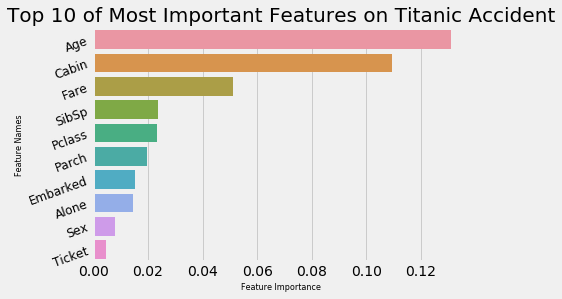

In [108]:
sns.barplot(x=out.values, y=out.index, order = out.index[:10])
plt.xlabel("Feature Importance", size = 8)
plt.ylabel("Feature Names", size = 8)
plt.yticks(rotation = 20, size=12)
plt.title("Top 10 of Most Important Features on Titanic Accident", size = 20);